In [ ]:
"""
Filename: error_behavior.ipynb
Author: Alexay Mehra
Date: 2025-09-10
Description: File which contains code to study the behavior of error vs gate depth
"""

In [ ]:
# Imports

import os, sys
sys.path.append(os.path.abspath("../src"))

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from optimization import morse_to_optimize, fidelity_loss

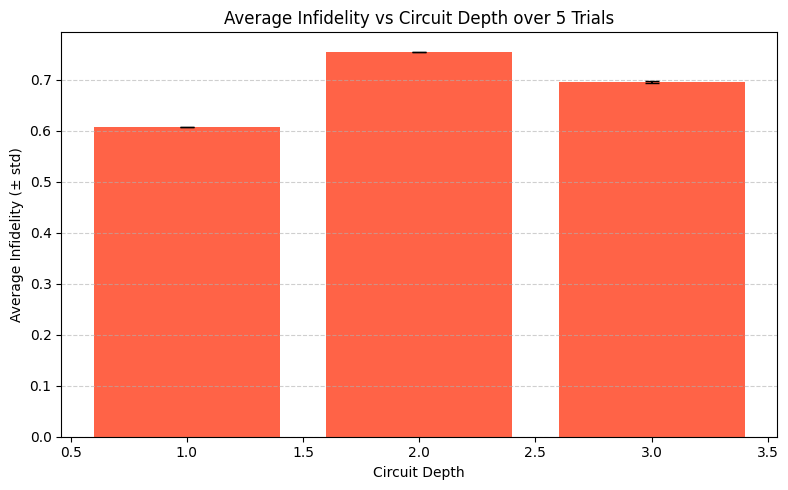

Depth 1: mean = 0.606418, std = 0.000000
Depth 2: mean = 0.754178, std = 0.000832
Depth 3: mean = 0.696027, std = 0.002070


In [4]:
# Infidelity vs Gate Depth

min_depth = 1
max_depth = 3
depths = [x for x in range(min_depth, max_depth + 1)]
infidelities_mean = []
infidelities_std = []

n_trials = 5  # Number of optimization runs per depth

for depth in depths:
    num_params = depth * 4
    trial_infid = []

    for trial in range(n_trials):
        init_guess = np.random.rand(num_params) * 0.1

        result = sp.optimize.minimize(
            fidelity_loss,
            init_guess,
            args=(depth, morse_to_optimize),
            method='BFGS',
            options={'disp': False}
        )

        params_optimized = result.x
        infid = fidelity_loss(params_optimized, depth, morse_to_optimize)
        trial_infid.append(infid)

    # Record average and std dev
    infidelities_mean.append(np.mean(trial_infid))
    infidelities_std.append(np.std(trial_infid))

# --- Plot with error bars ---
plt.figure(figsize=(8, 5))
plt.bar(depths, infidelities_mean, yerr=infidelities_std, capsize=5, color='tomato')
plt.xlabel('Circuit Depth')
plt.ylabel('Average Infidelity (± std)')
plt.title(f'Average Infidelity vs Circuit Depth over {n_trials} Trials')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: print full data
for d, mean, std in zip(depths, infidelities_mean, infidelities_std):
    print(f"Depth {d}: mean = {mean:.6f}, std = {std:.6f}")